# OpenSBLI Benchmark

## Setup Section

In [1]:
import re
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})
sns.set_context("paper")

In [2]:
def gettiming(filename):
    infile = open(filename, 'r')
    timing = 0.0
    for line in infile:
        if re.search('Total Wall', line):
            line = line.strip()
            tokens = line.split(',')
            timing = float(tokens[1])
    infile.close()
    return timing

In [3]:
def calcperf(filedict, cpn):
    coreslist = []
    timelist = []
    sulist = []
    print "{:>15s} {:>15s} {:>15s} {:>15s}".format('Nodes', 'Cores', 'Time (s)', 'Speedup')
    print "{:>15s} {:>15s} {:>15s} {:>15s}".format('=====', '=====', '========', '=======')
    for nodes, filename in sorted(filedict.items()):
        coreslist.append(nodes*cpn)
        t = gettiming(filename)
        timelist.append(t)
        speedup = timelist[0]/t
        sulist.append(speedup)
        print "{:>15d} {:>15d} {:>15.1f} {:>15.2f}".format(nodes, nodes*cpn, t, speedup)
    return coreslist, timelist, sulist

In [4]:
archerfiles = {5:'../results/ARCHER/output_5nodes.txt',
               20:'../results/ARCHER/output_20nodes_201711250859.txt',
               40:'../results/ARCHER/output_40nodes_201711250903.txt',
               80:'../results/ARCHER/output_80nodes.txt',
               160:'../results/ARCHER/output_160nodes.txt',
               256:'../results/ARCHER/output_256nodes.txt',
               384:'../results/ARCHER/output_384nodes.txt',
               512:'../results/ARCHER/output_512nodes.txt',
               640:'../results/ARCHER/output_640nodes.txt',
               768:'../results/ARCHER/output_768nodes.txt',
               896:'../results/ARCHER/output_896nodes.txt',
               }

In [5]:
archercpn = 24
archercores, archertime, archersu = calcperf(archerfiles, archercpn)

          Nodes           Cores        Time (s)         Speedup
          =====           =====        ========         =======
              5             120           189.0            1.00
             20             480            46.8            4.03
             40             960            24.8            7.61
             80            1920            19.6            9.62
            160            3840             5.2           36.27
            256            6144             3.7           51.73
            384            9216             2.3           80.54
            512           12288             1.8          104.73
            640           15360             1.8          102.61
            768           18432             1.3          149.74
            896           21504             1.0          179.98


In [6]:
cirrusfiles = {5:'../results/Cirrus/output_5nodes.txt',
               20:'../results/Cirrus/output_20nodes.txt',
               40:'../results/Cirrus/output_40nodes.txt',
               80:'../results/Cirrus/output_80nodes.txt',
               160:'../results/Cirrus/output_160nodes.txt',
               260:'../results/Cirrus/output_260nodes.txt'
               }

In [7]:
cirruscpn = 36
cirruscores, cirrustime, cirrussu = calcperf(cirrusfiles, cirruscpn)

          Nodes           Cores        Time (s)         Speedup
          =====           =====        ========         =======
              5             180           187.8            1.00
             20             720            47.5            3.95
             40            1440            22.8            8.22
             80            2880            10.9           17.17
            160            5760             5.8           32.49
            260            9360             3.6           52.53


In [8]:
csd3sfiles = {2:'../results/CSD3Skylake/output_2nodes_201711251131.txt',
              5:'../results/CSD3Skylake/output_5nodes_201711251143.txt',
              20:'../results/CSD3Skylake/output_20nodes_201711251147.txt',
              32:'../results/CSD3Skylake/output_32nodes_201711301117.txt',
             }

In [9]:
csd3scpn = 32
csd3scores, csd3stime, csd3ssu = calcperf(csd3sfiles, csd3scpn)

          Nodes           Cores        Time (s)         Speedup
          =====           =====        ========         =======
              2              64           328.3            1.00
              5             160           154.4            2.13
             20             640            39.2            8.38
             32            1024            22.5           14.58


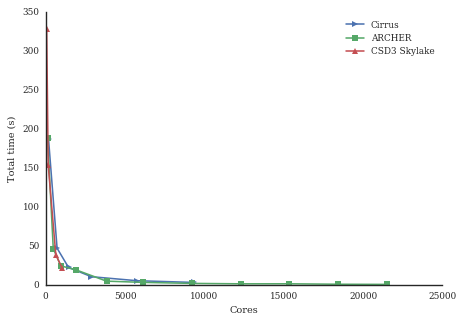

In [10]:
plt.plot(cirruscores, cirrustime, '>-', label='Cirrus')
plt.plot(archercores, archertime, 's-', label='ARCHER')
plt.plot(csd3scores, csd3stime, '^-', label='CSD3 Skylake')
plt.xlabel('Cores')
plt.ylabel('Total time (s)')
plt.legend(loc='best')
sns.despine()

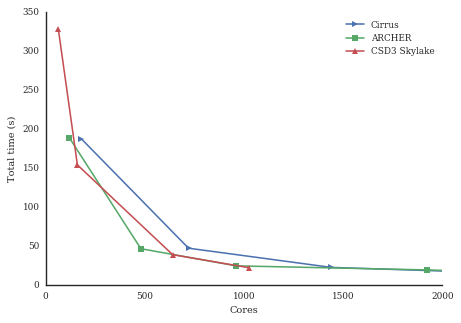

In [11]:
plt.plot(cirruscores, cirrustime, '>-', label='Cirrus')
plt.plot(archercores, archertime, 's-', label='ARCHER')
plt.plot(csd3scores, csd3stime, '^-', label='CSD3 Skylake')
plt.xlim([0,2000])
plt.xlabel('Cores')
plt.ylabel('Total time (s)')
plt.legend(loc='best')
sns.despine()

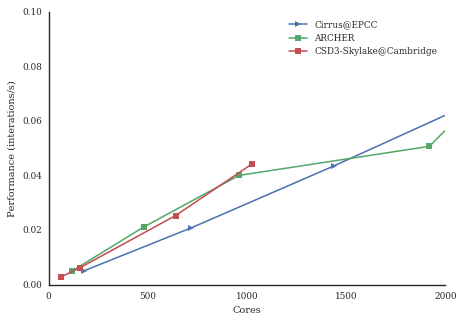

In [12]:
plt.plot(cirruscores, [1/x for x in cirrustime], '>-', label='Cirrus@EPCC')
plt.plot(archercores, [1/x for x in archertime], 's-', label='ARCHER')
plt.plot(csd3scores, [1/x for x in csd3stime], 's-', label='CSD3-Skylake@Cambridge')
plt.xlim([0,2000])
plt.ylim([0,0.1])
plt.xlabel('Cores')
plt.ylabel('Performance (interations/s)')
plt.legend(loc='best')
sns.despine()
plt.savefig('osbli_tgv_perf.png', dpi=300)

In [13]:
nperf = {}
cperf = {}
nperf['ARCHER'] = archertime[0]
cperf['ARCHER'] = archertime[0]/(archercpn)
nperf['Cirrus'] = cirrustime[0]
cperf['Cirrus'] = cirrustime[0]/(cirruscpn)
nperf['CSD3-Skylake'] = csd3stime[1]
cperf['CSD3-Skylake'] = csd3stime[1]/(csd3scpn)

print "Performance improvement relative to ARCHER:\n"
print "{:>15s} {:>15s} {:>15s}".format('System', 'Iter. Time (s)', 'Improvement')
print "{:>15s} {:>15s} {:>15s}".format('======', '==============', '===========')
print "5-node"
for system in sorted(nperf):
    print "{:>15s} {:>15.3f} {:>15.3f}".format(system, nperf[system], nperf['ARCHER']/nperf[system])

print "per-core"
for system in sorted(cperf):
    print "{:>15s} {:>15.3f} {:>15.3f}".format(system, cperf[system], cperf['ARCHER']/cperf[system])

Performance improvement relative to ARCHER:

         System  Iter. Time (s)     Improvement
         ======  ==============     ===========
5-node
         ARCHER         188.976           1.000
   CSD3-Skylake         154.398           1.224
         Cirrus         187.797           1.006
per-core
         ARCHER           7.874           1.000
   CSD3-Skylake           4.825           1.632
         Cirrus           5.217           1.509
